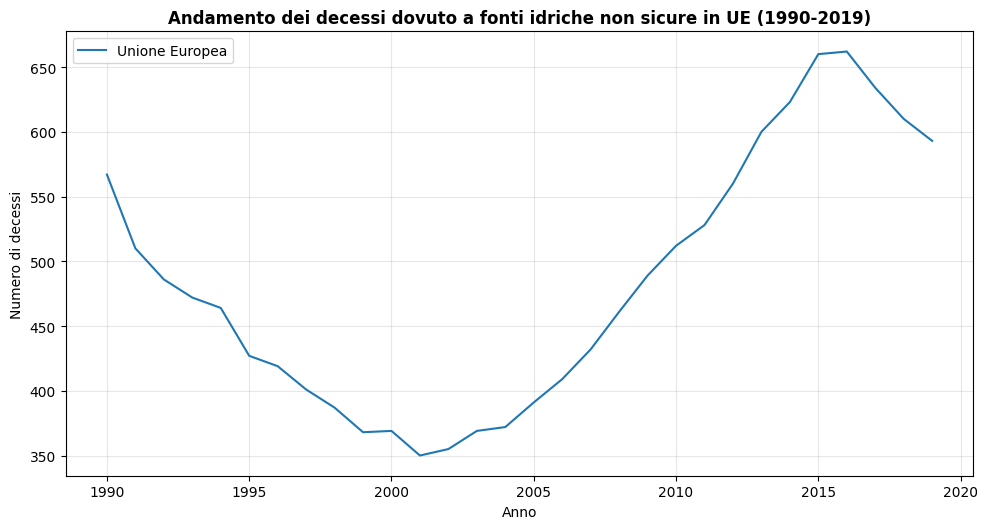

In [3]:
#Perido 1990-2019
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il dataset
data = pd.read_csv("/home/mile/progetto VS/Dataset/inquinamento idrico/numero_di_decessi_da_fattori_rischiosi/number-of-deaths-by-risk-factor.csv", sep=',', quotechar='"')

# Lista dei paesi dell'UE
eu_paesi = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
    'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
    'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden'
]

# Filtra i dati per i paesi dell'UE
data_filtered = data[(data['Entity'].isin(eu_paesi))]

# Seleziona solo le colonne di interesse
columns_of_interest = [
    'Entity', 
    'Year', 
    'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)'
]
data_filtered = data_filtered[columns_of_interest]

# Raggruppa i dati per anno e somma i decessi per ogni anno (puoi anche usare .mean() per la media)
data_grouped_ue = data_filtered.groupby('Year').agg({
    'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)': 'sum'
}).reset_index()

# Crea il grafico con un'unica linea per l'andamento nell'UE
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_grouped_ue, 
             x='Year', 
             y='Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)', 
             label='Unione Europea'
             #palette='colorblind'
             )

# Aggiungi titolo e etichette
plt.title('Andamento dei decessi dovuto a fonti idriche non sicure in UE (1990-2019)', fontsize=12, fontweight='bold')
plt.xlabel('Anno')
plt.ylabel('Numero di decessi')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.30)
plt.tight_layout(rect=[0, 0, 1, 0.9])
# Mostra il grafico
plt.show()


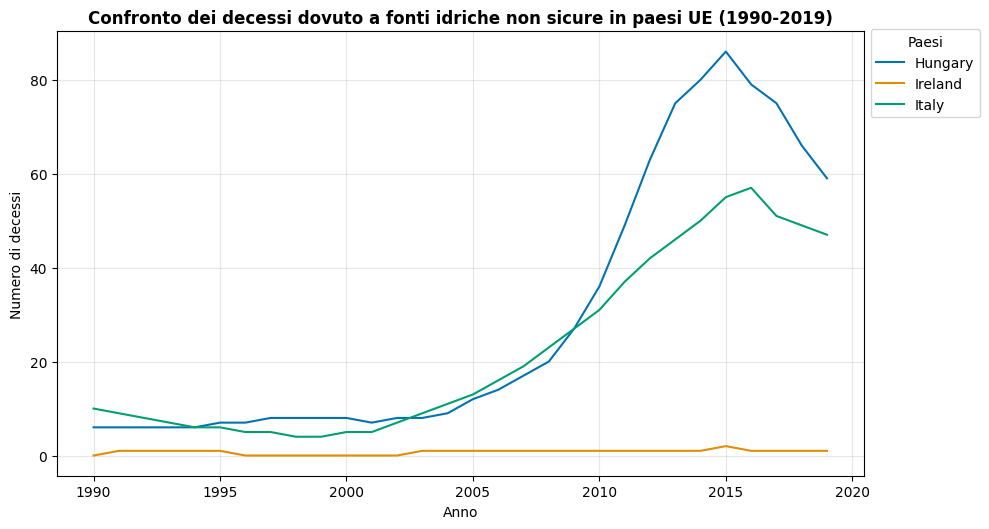

In [4]:
countries=['Hungary','Ireland','Italy']

data_filtered = data[(data['Entity'].isin(countries))]

# Seleziona solo le colonne di interesse
columns_of_interest = [
    'Entity', 
    'Year', 
    'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)'
]
data_filtered = data_filtered[columns_of_interest]
#print(data_filtered)

# Raggruppa i dati per anno e somma i decessi per ogni anno (puoi anche usare .mean() per la media)
data_grouped_countries = data_filtered.groupby(['Year', 'Entity']).agg({
    'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)': 'sum'
}).reset_index()

# Crea il grafico a linee
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_grouped_countries, 
             x='Year',
             y='Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)', 
             hue='Entity',
             palette='colorblind')

# Aggiungi titolo e etichette
plt.title('Confronto dei decessi dovuto a fonti idriche non sicure in paesi UE (1990-2019)', fontsize=12, fontweight='bold')
plt.xlabel('Anno')
plt.ylabel('Numero di decessi')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.30)
plt.legend(title='Paesi', bbox_to_anchor=(1, 1.020), loc='best')
plt.tight_layout(rect=[0, 0, 1, 0.9])
# Mostra il grafico
plt.show()
